<div class="usecase-title"> Urban Development Analysis </div>

<div class="usecase-authors"><b>Authored by: </b> Daljeet Kaur </div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<h2>Scenario</h2>
<div>The city of melbourne is experiencing rapid population growth and urbanization, presenting both opportunities and challenges for sustainable development. My objective is to analyze various datasets related to urban planning, infrastructure, transportation, housing, and economic development to inform stakeholders and develop strategies for managing and enhancing urban areas.
And  need to analyse the dataset includes information on zoning regulations, land use plans, building permits, and development proposals across different neighborhoods in Melbourne and the dataset provides This dataset provides details on public transportation networks, road infrastructure,housing prices, rental rates, vacancy rates, housing affordability indices and also offers insights into the local economy, including employment trends, business growth rates.
With the dataset will analyze Melbourne's urban planning data to identify development patterns, such as areas experiencing rapid growth, redevelopment opportunities, and underutilized spaces that could be repurposed for urban revitalization projects and aim to provide valuable insights and recommendations to stakeholders, giving the information on decision making and enhance urban areas in Melbourne City effectively</div>

<h3>What this use case will teach you</h3>

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
* Understand various data analysis techniques, including data cleaning, data visualization, statistical analysis, and predictive modeling, to derive insights from complex urban datasets.
* Gain a deeper understanding of urban planning, transportation systems, housing markets, economic development, which are crucial for managing and enhancing urban areas.
* Will be proficient in using data science tools and technologies such as Python programming and machine learning algorithms to analyze and interpret urban datasets effectively.
* Identify and resolve key challenges and opportunities in urban development, formulate hypotheses, and figure out solutions to address them.
* At the end of the project will gain experience in managing data science projects from end to end, including data collection, preprocessing, analysis, interpretation, and presentation of results to stakeholders.

<h3>Introduction</h3>

The Urban Development Analysis use case objective is to use the dataset from the city of melbourne to provide the insight and to address the challenges of managing and enhancing urban areas. In this prjoect by using the key datasets, including the Development Activity Monitor, High Rise Residents Profile 2016, and Business Establishments and Jobs Data, provide valuable information on urban planning, demographics, and economic dynamics.

The objective is to analyze these datasets completely to understand development trends, demographic patterns, and economic dynamics within the urban landscape. The stakeholders can make informed decisions and develop strategies to promote sustainable growth and improvement in urban areas and enable them to shape the future of urban development in a strategic and sustainable manner.

<h4>Dataset List</h4>

* [development-activity-monitor](https://data.melbourne.vic.gov.au/explore/dataset/development-activity-monitor/information/?disjunctive.status&disjunctive.clue_small_area&disjunctive.clue_block)
* [High Rise Residents Profile 2016](https://data.melbourne.vic.gov.au/explore/dataset/high-rise-residents-profile-2016/information/)
* [Business establishments and jobs data by business size and industry](https://data.melbourne.vic.gov.au/explore/dataset/business-establishments-and-jobs-data-by-business-size-and-industry/information/)


In [50]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import requests
import os
import json
import io
import warnings
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install category_encoders
import category_encoders as ce
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from io import StringIO

In [ ]:
def API_Unlimited(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))


"""
Get unlimited data from the API Function 

Parameters:
datasetname (string): dataset name as from city of melbourn 
apikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)

f = open("API.txt","r")
api_key = f.read()

Returns:
Csv : Returns the csv dataset of the dataset name 
"""


In [ ]:
download_link_1 = 'development-activity-monitor'
download_link_2 = 'high-rise-residents-profile-2016'
download_link_3 = 'business-establishments-and-jobs-data-by-business-size-and-industry'

# Use functions to download and load data
df1 = API_Unlimited(download_link_1)
df2 = API_Unlimited(download_link_2)
df3 = API_Unlimited(download_link_3)

<h2>Data cleaning and preprocessing for Development Activity Monitor</h2>

In [3]:
# Convert DataFrame df1 to dataset1
dataset1 = pd.DataFrame(df1)
# Display the first 3 rows of dataset1
dataset1.head(3)

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000288,COMPLETED,2011.0,Melbourne (CBD),104,150-154 A'Beckett Street MELBOURNE VIC 3000,100163,NaN,NaN,...,0,0,0,0,0,0,0,144.958971,-37.809597,"-37.80959665, 144.9589709"
1,Pre May 16,X000449,COMPLETED,2009.0,North Melbourne,315,North Melbourne Recreation Reserve 204-206 Ard...,100514,NaN,NaN,...,0,2494,0,0,0,0,0,144.941433,-37.798926,"-37.79892607, 144.9414326"
2,Pre May 16,X000395,COMPLETED,2005.0,Carlton,257,24-30 Barkly Place CARLTON VIC 3053,100732,NaN,NaN,...,0,0,0,0,0,0,0,144.961448,-37.803003,"-37.803003, 144.9614476"


In [4]:
# Get the shape of DataFrame df1
dataset1.shape

(1433, 42)

In [5]:
# Check for missing values in DataFrame df1
dataset1.isna().sum()

data_format                       0
development_key                   0
status                            0
year_completed                  395
clue_small_area                   0
clue_block                        0
street_address                    0
property_id                       0
property_id_2                  1257
property_id_3                  1394
property_id_4                  1419
property_id_5                  1430
floors_above                      0
resi_dwellings                    0
studio_dwe                        0
one_bdrm_dwe                      0
two_bdrm_dwe                      0
three_bdrm_dwe                    0
student_apartments                0
student_beds                      0
student_accommodation_units       0
institutional_accom_beds          0
hotel_rooms                       0
serviced_apartments               0
hotels_serviced_apartments        0
hostel_beds                       0
childcare_places                  0
office_flr                  

In [6]:
# Drop rows with missing values from DataFrame df1
dataset1.dropna(inplace = True)

In [7]:
ds1 = df1['year_completed'].isna()


In [8]:
# Selecting specific columns from df1
develop_monitor1 = df1.iloc[:,[0,2,3,4,13,14,15,16,17,18]]
# Display the first 2 rows of develop_monitor1
develop_monitor1.head(2)

,data_format,status,year_completed,clue_small_area,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments
0,Pre May 16,COMPLETED,2011.0,Melbourne (CBD),0,0,0,0,0,0
1,Pre May 16,COMPLETED,2009.0,North Melbourne,0,0,0,0,0,0


In [9]:
# Filter rows where 'status' is 'COMPLETED'
develop_monitor1 = develop_monitor1.loc[develop_monitor1['status'] == 'COMPLETED']
# Drop columns 'status' and 'data_format' from develop_monitor1
develop_monitor1 = develop_monitor1.drop(['status','data_format'], axis =1)
# Display the first 2 rows of develop_monitor1
develop_monitor1.head(2)

,year_completed,clue_small_area,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments
0,2011.0,Melbourne (CBD),0,0,0,0,0,0
1,2009.0,North Melbourne,0,0,0,0,0,0


In [10]:
# Calculate the sum across rows for columns at indices 2 to 7
develop_monitor1.iloc[:,2:8].sum(axis=1)

0         0
1         0
2        83
3       280
4         0
       ... 
1301    326
1302     32
1303      0
1304     36
1411    138
Length: 1038, dtype: int64

In [11]:
# Calculate the sum across specified columns and assign it to 'dev_totalvalue' column
develop_monitor1['dev_totalvalue'] = develop_monitor1.loc[:,['resi_dwellings', 'studio_dwe', 'one_bdrm_dwe', 'two_bdrm_dwe', 'three_bdrm_dwe','student_apartments']].sum(axis=1)

In [12]:
# Changing year into Date format
from datetime import datetime
# Convert 'year_completed' column to datetime format and extract the year
date = (pd.to_datetime(develop_monitor1['year_completed'],format=('%Y'),exact ='False')).dt.year
date
# Creating a new column 'year' in develop_monitor1 with extracted year from 'year_completed'
develop_monitor1['year'] = (pd.to_datetime(develop_monitor1['year_completed'],format=('%Y'),exact ='False')).dt.year
# Selecting specific columns to create a new DataFrame dev_mon
dev_mon= develop_monitor1.iloc[:,[-1,1,-2]]



In [13]:
# Check for duplicate combinations of 'clue_small_area' and 'year'
dev_dup = dev_mon.loc[:,['clue_small_area','year']].duplicated(keep=False)
# Sort the filtered DataFrame by 'clue_small_area'
dev_mon=dev_mon[dev_dup].sort_values(by=['clue_small_area'])



In [14]:
# Rename columns 'clue_small_area' to 'city' and 'year' to 'Census_Year'
develop_monitor = dev_mon.rename(columns = {"clue_small_area":"city", "year":"Census_Year"} )

# Display the first 2 rows of the renamed DataFrame
develop_monitor.head(2)

,Census_Year,city,dev_totalvalue
780,2017,Carlton,432
719,2014,Carlton,224


Downloaded the data for Development Activity Monitor through API URL and then loaded this data into Pandas DataFrame df1 and initialed the data cleaning steps on the first dataset (df1) by dropping rows with missing values and filtering out rows and certain columns in the dataset and performed data   formatting by converting the "year_completed" column into a datetime format and extracts the year and  then combined this information with other columns to create a new DataFrame (develop_monitor) with renamed columns

<h2>Data cleaning and preprocessing for High Rise Residents Profile 2016</h2>

In [15]:
# Convert DataFrame df2 to dataset2
dataset2 = pd.DataFrame(df2)
# display first 3 rows
dataset2.head(3)

,Profile,Census_Year,Category,Sub_Category,Sub_Order,Value
0,Carlton (high rise residents),2016,Gender,Female,2,6082.0
1,Carlton (high rise residents),2016,Age,10-19 years,2,2006.0
2,Carlton (high rise residents),2016,Age,40-49 years,5,569.0


In [16]:
# Drop columns 'Profile' and 'Sub_Order' from dataset2
dataset2.drop(['Profile','Sub_Order'
       ], axis=1)


,Census_Year,Category,Sub_Category,Value
0,2016,Gender,Female,6082.0
1,2016,Age,10-19 years,2006.0
2,2016,Age,40-49 years,569.0
3,2016,Age,50-59 years,460.0
4,2016,Age,60-69 years,316.0
...,...,...,...,...
3384,2016,Number of bedrooms,Six bedrooms or more,144.0
3385,2016,Number of bedrooms,Bedrooms not stated,9987.0
3386,2016,Vehicle ownership,Four or more motor vehicles,307.0
3387,2016,Usual address 1 year ago,Same as in 2016,41673.0


In [17]:
# Select columns at indices 1, 3, and 5 from dataset2
resident = dataset2.iloc[:,[1,3,5]]
# display first 2 rows
resident.head(2)


,Census_Year,Sub_Category,Value
0,2016,Female,6082.0
1,2016,10-19 years,2006.0


Downloaded the data for high-rise residents profile in Melbourne through API URL and then loaded this data into Pandas DataFrame df2.Two columns, namely 'Profile' and 'Sub_Order', are dropped from the dataset2 DataFrame using the drop() method and a subset of columns is selected from the dataset2, containing columns at indices 1, 3, and 5 and stored in a new DataFrame called resident.

<h2>Data cleaning and preprocessing for Business establishments and jobs data by business size and industry</h2>

In [18]:
# Convert DataFrame df3 to dataset3
dataset3 = pd.DataFrame(df3)
# display first 3 rows
dataset3.head(3)

,Census year,CLUE small area,ANZSIC indusrty,CLUE industry,Business size,Total establishments,Total jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN


In [19]:
# Rename columns in dataset3
jobs_data = dataset3.rename(columns = {"CLUE small area":"city", "CLUE industry":"Job_industry", "Business size":"Business_size","Total jobs":"Total_jobs","Census year":"Census_Year"} )

In [20]:
# Get the shape of the DataFrame jobs_data
jobs_data.shape

(14692, 7)

In [21]:
# Drop rows with missing values from the DataFrame jobs_data
jobs_data.dropna(inplace = True)

In [22]:
# Check for missing values in the DataFrame jobs_data
jobs_data.isna().sum()

Census_Year             0
city                    0
ANZSIC indusrty         0
Job_industry            0
Business_size           0
Total establishments    0
Total_jobs              0
dtype: int64

In [23]:
# Drop columns 'ANZSIC industry', 'Total establishments', and 'Job_industry' from jobs_data
jobs_data= jobs_data.drop(['ANZSIC indusrty','Total establishments','Job_industry'
       ], axis=1)
#display frst 2 rows
jobs_data.head(2)



,Census_Year,city,Business_size,Total_jobs
1,2015,West Melbourne (Residential),Medium business,171.0
3,2015,West Melbourne (Residential),Non employing,0.0


Downloaded the data for business establishments and jobs data by business size and industry in Melbourne. through API URL and then loaded this data into Pandas DataFrame df3, performed data cleaning process by using dropna() missing values in the jobs_data DataFrame and certain columns columns which are unnecessary for analysis are dropped from the jobs_data and hence perfomed data processing steps such as data loading, cleaning, transformation, and formatting, preparing the data for further analysis for all the three dataset

<h2>Exploratory Data Analysis</h2>

In [24]:
def dev_mon(data):
    '''
      to visualise the resi_dwellings data
    '''
     # Create a bar plot
    ax = sns.barplot(
    y='studio_dwe',
    x = 'clue_small_area',
    data = develop_monitor1

        )
    warnings.filterwarnings('ignore')
    # Set the style of the plot
    sns.set_style("whitegrid")
    # Rotate x-axis labels for better readability
    plt.xticks(rotation =90)
    # Set the title of the plot
    plt.title('Total number of studio_dwe for Melbourne')
    # Show the plot
    plt.show()


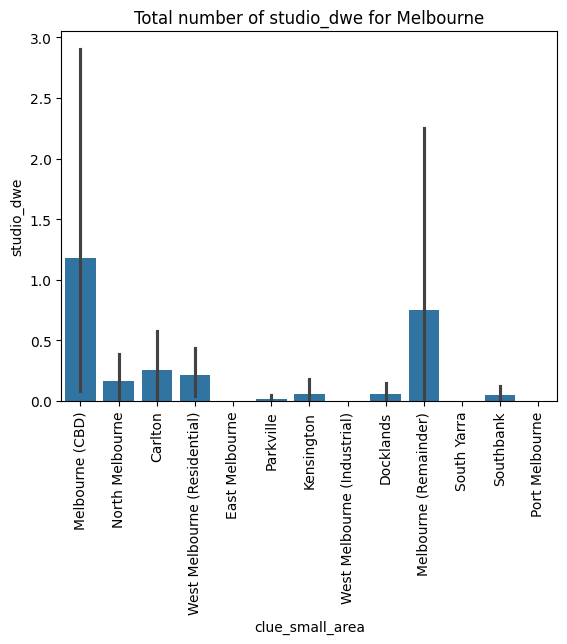

In [25]:
# Call the dev_mon function with the specified DataFrame (develop_monitor1)
dev_mon(develop_monitor1)

This function dev_mon visualizes the 'studio_dwe' data using a bar plot and visualizes the 'studio_dwe' data using a seaborn bar plot. It sets the style of the plot, rotates the x-axis labels for better readability, sets the title of the plot, and then displays the plot. and the plot represnts the visualization of an overview of studio dwelling distribution across different areas

In [26]:
def dev_mon(data):
    '''
      to visualise the resi_dwellings data
    '''
    # Create a box plot
    ax = sns.boxplot(
    y='resi_dwellings',
    x = 'clue_small_area',
    data = develop_monitor1

        )
    warnings.filterwarnings('ignore')
    # Set the style of the plot
    sns.set_style("whitegrid")
    # Rotate x-axis labels for better readability
    plt.xticks(rotation =90)
    # Set the title of the plot
    plt.title('Total number of resi_dwellings for Melbourne')
    # Show the plot
    plt.show()


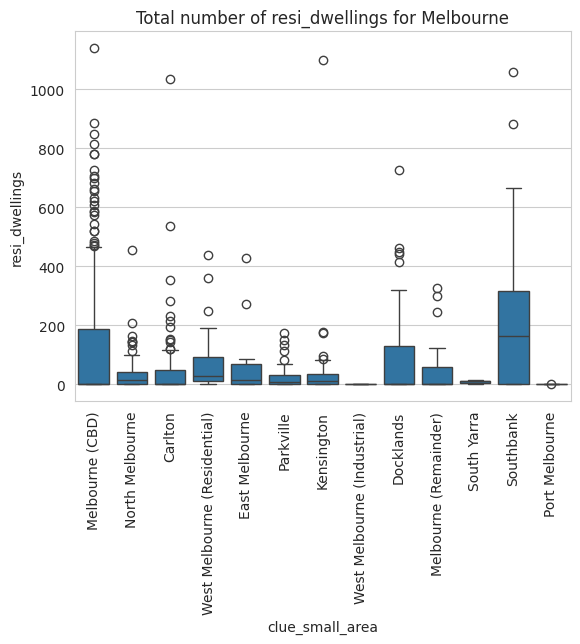

In [27]:
# Call the dev_mon function with the specified DataFrame (develop_monitor1)
dev_mon(develop_monitor1)

The dev_mon function visualizes the 'resi_dwellings' data using a box plot and and visualizes the 'resi_dwellings' data using a seaborn box plot. It sets the style of the plot, rotates the x-axis labels for better readability, sets the title of the plot, and then displays the plot and the plot helps to understand the spread and distribution of residential dwellings in different areas

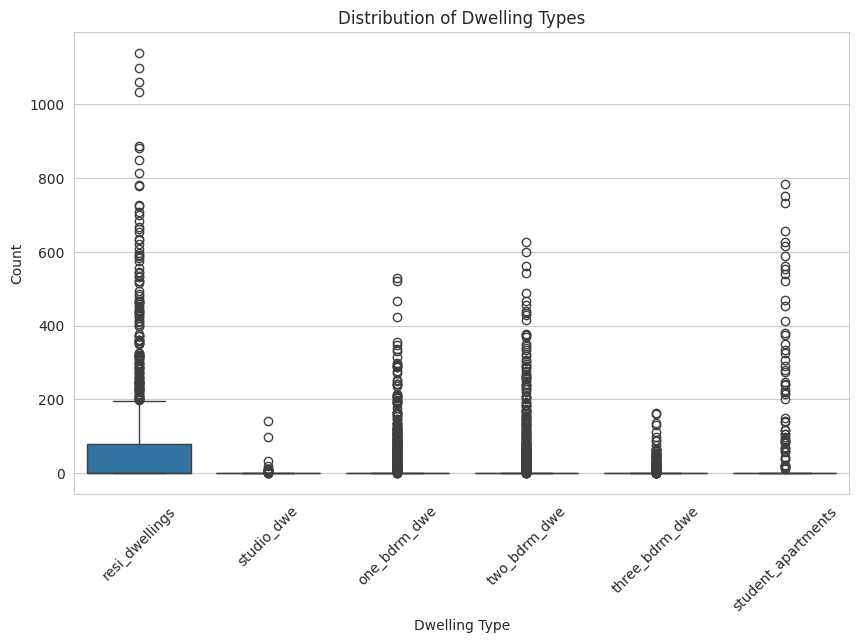

In [28]:


def dev_mon(data):
    '''
    Visualize the distribution of various dwelling types.
    '''
    # Melt the DataFrame to long format
    melted_df = data.melt(id_vars=['clue_small_area'], value_vars=['resi_dwellings', 'studio_dwe', 'one_bdrm_dwe', 'two_bdrm_dwe', 'three_bdrm_dwe', 'student_apartments'], var_name='Dwelling Type', value_name='Count')

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dwelling Type', y='Count', data=melted_df)
    plt.xticks(rotation=45)
    plt.title('Distribution of Dwelling Types')
    plt.xlabel('Dwelling Type')
    plt.ylabel('Count')
    plt.show()

# Call the function with the DataFrame
dev_mon(develop_monitor1)


The above visualization provide insights into different aspects of dwelling distributions in Melbourne, offering a visual understanding of the data's characteristics and this bar plot shows the  total number of dwellings across different Melbourne suburbs and The above  box plot shows the distribution of counts for each dwelling type across different areas in Melbourne.


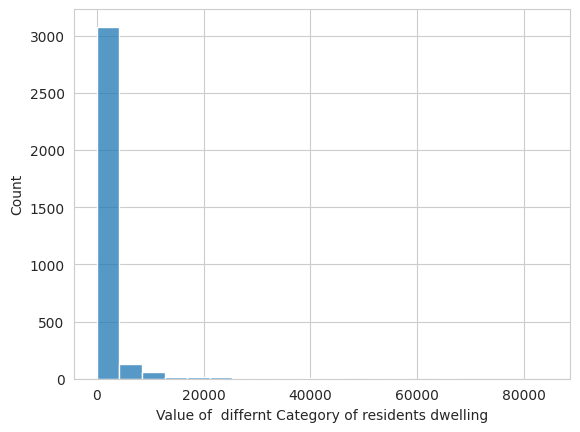

<Figure size 1000x1000 with 0 Axes>

In [29]:
# Create a histogram to visualize the distribution of values
sns.histplot(dataset2.Value,bins=20)
# Set x-axis label
plt.xlabel("Value of  differnt Category of residents dwelling")
# Set figure size
plt.figure(figsize=(10,10))
# Show the plot
plt.show()

The above code creates a histogram to visualize the distribution of values in the 'Value' column of dataset2, presumably representing different categories of residents' dwellings  with 20 bins and  It sets the x-axis label and the figure size before displaying the plot.

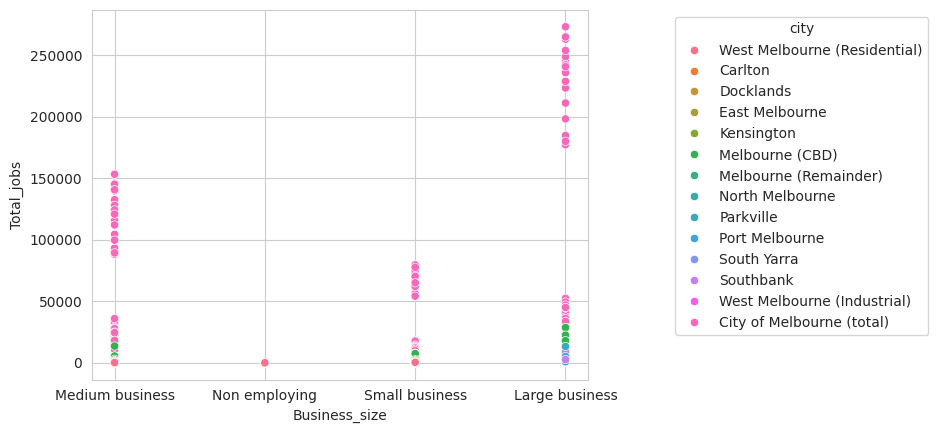

In [30]:
# Create a scatter plot with seaborn
p = sns.scatterplot(data=jobs_data,x="Business_size", y="Total_jobs", hue="city", legend=True )
# Move the legend to the upper-right corner
sns.move_legend(p, "upper right", bbox_to_anchor=(1.7, 1))

By creating a scatter plot to visualize the relationship between 'Business_size' and 'Total_jobs' in the jobs_data DataFrame, with different cities represented by different colors. It also moves the legend to the upper-right corner of the plot and the plot shows there is a positive correlation, where larger businesses tend to offer more jobs in city of melbourne

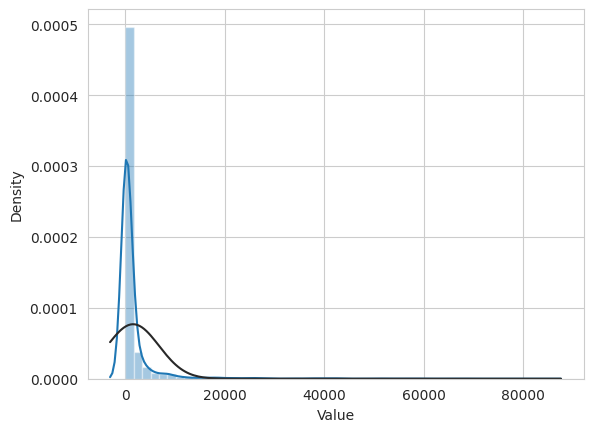

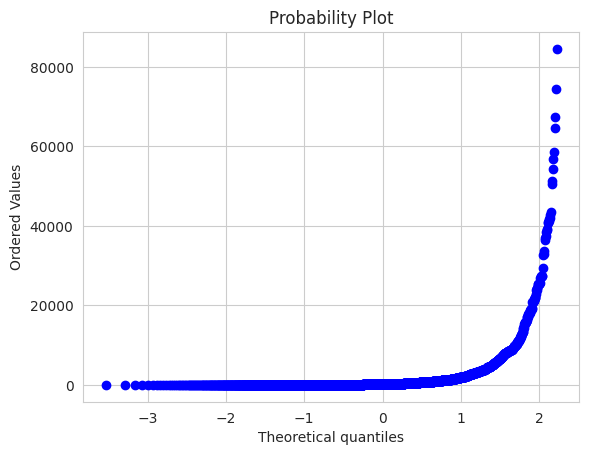

In [31]:
# Create a distribution plot (histogram) with a fitted normal distribution
sns.distplot(dataset2['Value'], fit=norm)
# Create a probability plot (Q-Q plot) to check for normality
fig = plt.figure()
prob = stats.probplot(dataset2['Value'], plot=plt)

The distribution plot (histogram) and a probability plot for the 'Value' column in dataset2, with a fitted normal distribution curve and A probability plot is generated for the 'Value' column of dataset2 using probplot() from SciPy's stats module. This plot helps to assess if the data follows a normal distribution It then creates a probability plot (Q-Q plot) to visually assess whether the data follows a normal distribution. Both plots are displayed separately.

<Axes: xlabel='Total_jobs', ylabel='Count'>

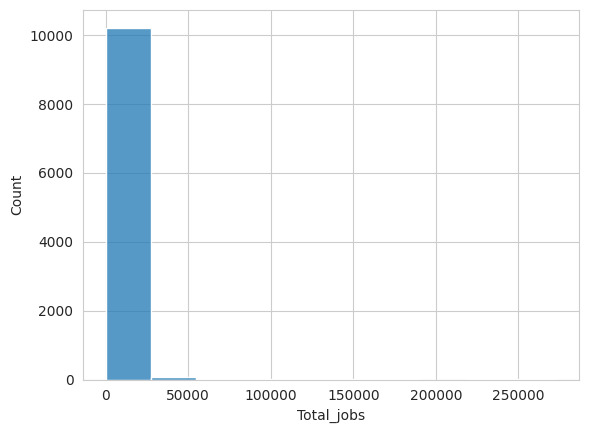

In [32]:
# Create a histogram to visualize the distribution of Total_jobs
sns.histplot(jobs_data.Total_jobs, bins=10)

A histogram to visualize the distribution of values in the 'Total_jobs' column of the jobs_data DataFrame  with 10 bins. It then displays the plot

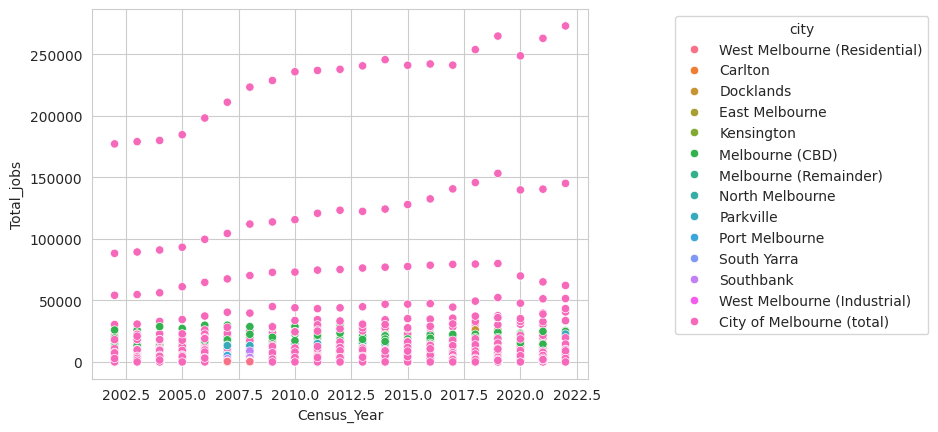

In [33]:
# Create a scatter plot with seaborn
p = sns.scatterplot(data=jobs_data,x="Census_Year", y="Total_jobs", hue="city", legend=True )

# Move the legend to the upper-right corner
sns.move_legend(p, "upper right", bbox_to_anchor=(1.7, 1))


A scatter plot to visualize the relationship between 'Census_Year' and 'Total_jobs' in the jobs_data DataFrame, with different cities represented by different colors. It also moves the legend to the upper-right corner of the plot.
The  Scatter Plot for jobs_data Total Jobs over Census Year generated to visualize the relationship between the total number of jobs (Total_jobs) and the census year (Census_Year) in jobs_dat

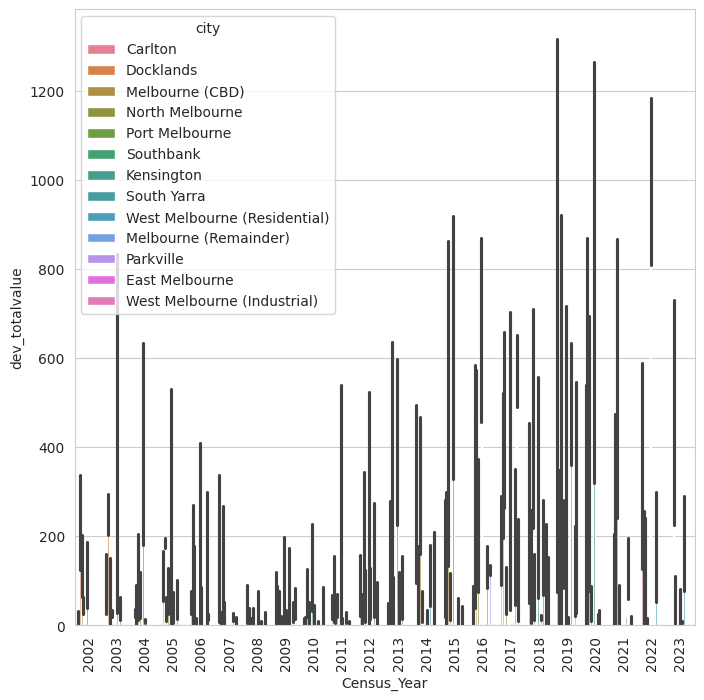

In [34]:
# Set the figure size
plt.figure(figsize=(8,8))
# Create a bar plot with seaborn
sns.barplot(data= develop_monitor, y="dev_totalvalue", x="Census_Year", hue="city")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()


Performed various visualizations using Seaborn and Matplotlib and A bar plot is created to show the total development value (dev_totalvalue) over different census years (Census_Year) in develop_monitor It sets the figure size and rotates the x-axis labels for better readability before displaying the plot. The bars are grouped by the city and the graph we can see  which suburbs had higher or lower development activity in that year.

<h2>Final format of dataset</h2>

Merging DataFrames:

In [35]:
# Merge jobs_data and resident DataFrames on the common column 'Census_Year'
urban_dev = pd.merge(jobs_data, resident, on="Census_Year")
# Merge the resulting DataFrame (urban_dev) with the develop_monitor DataFrame on the common columns 'Census_Year' and 'city'
urban_dev = pd.merge(urban_dev, develop_monitor, on=["Census_Year", "city"])


By merging three DataFrames (jobs_data, resident, and develop_monitor) based on common columns ('Census_Year' and 'city') using the pd.merge() function.The first merge combines jobs_data and resident on the common column 'Census_Year'. The result is stored in the DataFrame urban_dev and Then, the urban_dev DataFrame is merged with develop_monitor on both 'Census_Year' and 'city'The merged DataFrame urban_dev is displayed, showing the combined data from all three original DataFrames.

In [36]:
#display result
urban_dev


,Census_Year,city,Business_size,Total_jobs,Sub_Category,Value,dev_totalvalue
0,2016,Carlton,Non employing,0.0,Female,6082.0,88
1,2016,Carlton,Non employing,0.0,Female,6082.0,0
2,2016,Carlton,Non employing,0.0,10-19 years,2006.0,88
3,2016,Carlton,Non employing,0.0,10-19 years,2006.0,0
4,2016,Carlton,Non employing,0.0,40-49 years,569.0,88
...,...,...,...,...,...,...,...
5737572,2016,West Melbourne (Residential),Small business,131.0,Same as in 2016,41673.0,120
5737573,2016,West Melbourne (Residential),Small business,131.0,Same as in 2016,41673.0,178
5737574,2016,West Melbourne (Residential),Small business,131.0,Not stated,9674.0,84
5737575,2016,West Melbourne (Residential),Small business,131.0,Not stated,9674.0,120


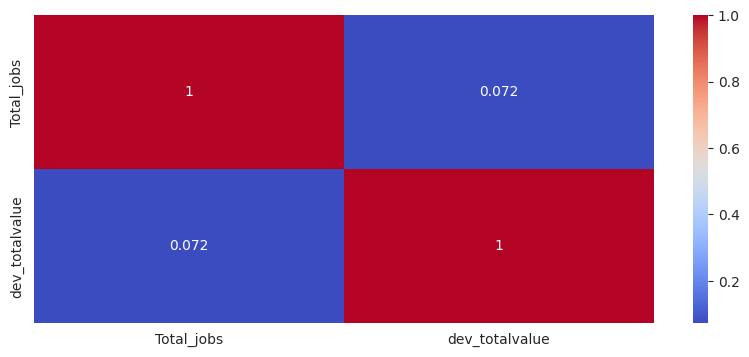

In [37]:
# Calculate the correlation matrix between 'Total_jobs' and 'dev_totalvalue'
correlation_matrix = urban_dev[['Total_jobs', 'dev_totalvalue']].corr()
# Set the figure size for the heatmap
plt.figure(figsize=(10,4))
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

Calculating Correlation Matrix calculates the correlation matrix between the 'Total_jobs' and 'dev_totalvalue' columns in the urban_dev DataFrame using the corr() method.A heatmap is generated to visualize the correlation matrix using Seaborn's heatmap() function and the correlation  total jobs and development value and it shows slight positive correlation between total jobs and development value.


<h2>Data Modelling</h2>

Linear Regression Model

In [53]:
ordinal_cols = ["Business_size", "Sub_Category"]
nominal_cols = ["city"]

# Apply label encoding to ordinal columns
ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_cols)
data = ordinal_encoder.fit_transform(urban_dev)

# Apply target encoding to nominal columns
target_encoder = ce.TargetEncoder(cols=nominal_cols)
data = target_encoder.fit_transform(data, data["Total_jobs"])

# Split the data into features (X) and target variable (y)
X = data.drop(columns=["Total_jobs"])  # Features
y = data["Total_jobs"]  # Target variable

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 10630811.829985723
R-squared: 0.2928164968352538


The Mean squared error Value indicates the squared difference between the predicted and actual values in the test set is approximately 10630811.82. Lower values are desirable, but the interpretation depends on the scale of the target variable and R-squared value 0.293 shows the  the variance in the target variable is explained by the independent variables included in the model and It's a relatively low R-squared value, and the model explains only a small portion of the variability in the target variable and might not be capturing all the relevant information or that there might be room for improvement in model features or complexity and may be needed to improve predictive performance.

<h3>Visualize the Predictions </h3>

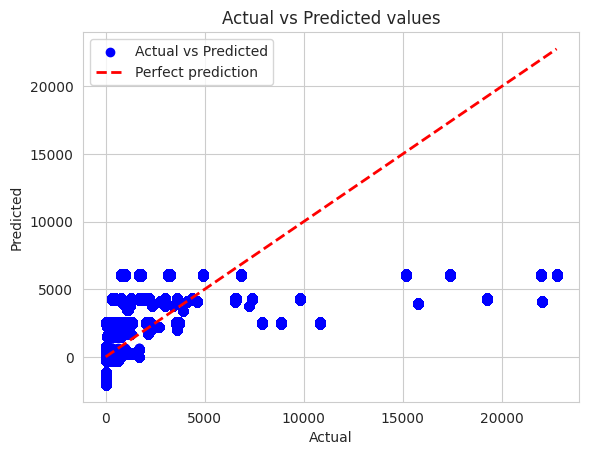

In [54]:
# Plot the actual vs predicted values
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

To visualize the predictions a scatter plot used to show the performance of a regression model, the  model is trying to predict a continuous value, likely based on another continuous value.The x-axis represents the actual values and the y-axis represents the predicted values. The blue data points represent the observations plotted against the corresponding predictions made by the model.The red dashed line represents a perfect prediction scenario, where all the data points would have fallen exactly on this line. The further the data points fall from this line, the greater the model's prediction error.In this plot  it appears that the model tends to underpredict the actual values, since most of the blue points are scattered above the red line.

<h3>References</h3>



1.   https://www.coursehero.com/file/213387939/ANALYSISdocx/
2.   https://data.melbourne.vic.gov.au/pages/home/
3.   https://www.geeksforgeeks.org/datetime-replace-function-in-python/
2.   https://seaborn.pydata.org/tutorial/distributions.html


